In [28]:
import pandas as pd
import numpy as np
import requests
import json
import os
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
from config import username, api_key
from city_list import slist, clist, alist

In [4]:
city_path = os.path.join("Data","combined_data_residential.csv")
df = pd.read_csv(city_path)
df.head()

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
3,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0


In [5]:
df2 = df[(df["CDD"] >= 0) & (df["HDD"] >= 0)]
df2.head()

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
0,Birmingham,AL,143.647642,50.020103,400.595034,96.557022,25.618049,NaN,143.311563,21.116271,1933,2770,62.78,22.46,73.94,51.44,5712,8
1,Mobile,AL,107.084979,50.998702,315.907443,117.940363,10.227344,NaN,120.403278,30.169515,2537,1656,67.46,18.68,76.64,58.10,6528,2
2,Anchorage,AK,133.111653,55.616592,270.506011,86.474614,66.884246,NaN,90.755170,13.434063,3,10201,37.04,14.00,44.06,30.02,1667,821
3,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0


In [6]:
df3 = df2.dropna()
df3

,city,state,mean site eui,mean site eui res,mean source eui,mean source eui res,mean fuel eui,mean fuel eui res,mean electric eui,mean electric eui res,CDD,HDD,Tavg,Trange,Tmax,Tmin,Prcp,Snow
3,Phoenix,AZ,66.839636,34.146045,200.353735,95.292175,4.228576,5.881798,76.588709,26.895603,3741,1359,71.42,34.34,88.70,54.32,876,0
4,Mesa,AZ,90.427591,30.461339,278.819932,95.648604,2.630878,0.000000,123.888037,30.461339,3592,1462,70.88,27.68,84.56,57.02,943,0
5,Tucson,AZ,111.380086,32.412979,331.288908,84.472751,8.777518,9.298245,119.370537,24.753733,1946,2486,63.50,37.22,82.04,44.96,1390,23
6,Yuma,AZ,89.963936,43.328682,275.588443,129.802519,2.726742,3.322212,139.602654,40.368228,3811,1129,72.32,29.84,87.26,57.38,368,0
7,Little Rock,AR,124.150876,61.015530,334.467534,139.299537,26.681641,25.018769,110.742169,36.937149,2170,3006,62.78,18.68,71.96,53.24,5468,44
8,Fayetteville,AR,136.078645,35.155192,364.645346,88.438439,31.320575,11.478266,115.174324,23.263998,1517,4013,58.28,20.84,68.54,47.66,4553,43
9,Conway,AR,113.451620,38.979745,312.372626,122.396399,22.037656,0.037681,94.732085,38.123944,1843,3472,60.44,22.82,71.96,49.10,4908,41
10,Los Angeles,CA,81.087951,27.359427,220.286297,54.786719,16.832243,14.489057,87.060861,12.482543,1638,880,67.10,22.64,78.44,55.76,2297,0
11,San Francisco,CA,64.640986,40.110887,158.428255,64.415370,16.371552,31.042033,62.009912,11.273363,174,2701,58.10,19.40,67.82,48.38,2674,0
12,San Diego,CA,60.451393,32.116250,145.160327,62.232609,21.450765,18.474799,52.791774,13.641363,1241,1909,63.14,21.92,74.12,52.16,1677,1


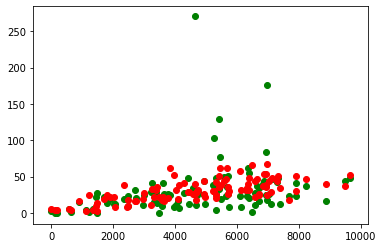

In [31]:
resfuel = df3["mean fuel eui res"]
comfuel = df3["mean fuel eui"]
hdd = df3["HDD"]

plt.scatter(hdd, resfuel, color="g")
plt.scatter(hdd, comfuel, color="r")
plt.show()


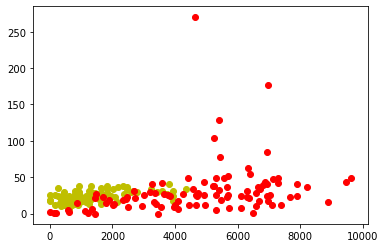

In [49]:
resele = df3["mean electric eui res"]
comele = df3["mean electric eui"]
cdd = df3["CDD"]

plt.scatter(cdd, resele, color="y")
plt.scatter(hdd, resfuel, color="r")
plt.show()

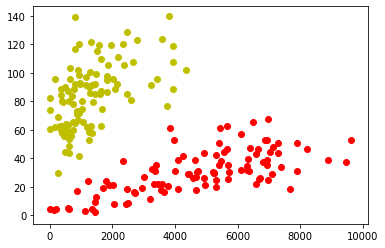

In [34]:
plt.scatter(cdd, comele, color="y")
plt.scatter(hdd, comfuel, color="r")
plt.show()

In [51]:
dfana = pd.DataFrame()
dfana["eui"] = comfuel
dfana["DD"] = hdd
dfana["type"] = "Fuel"
dfana2 = pd.DataFrame()
dfana2["eui"] = comele
dfana2["DD"] = cdd
dfana2["type"] = "Electric"
dfanacom = dfana.append(dfana2)

dfanar = pd.DataFrame()
dfanar["eui"] = resfuel
dfanar["DD"] = hdd
dfanar["type"] = "Fuel"
dfanar2 = pd.DataFrame()
dfanar2["eui"] = resele
dfanar2["DD"] = cdd
dfanar2["type"] = "Electric"
dfanares = dfanar.append(dfanar2)

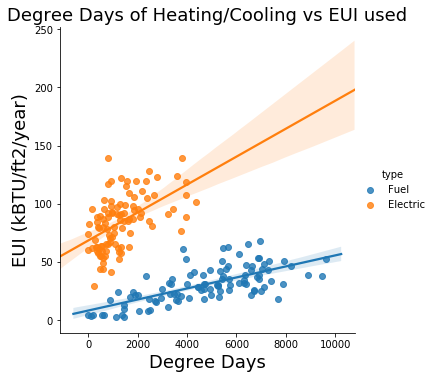

In [58]:
import seaborn

seaborn.lmplot(y='eui', x='DD', hue='type', data=dfanacom)
plt.title("Degree Days of Heating/Cooling vs EUI used",fontsize=18)
plt.ylabel("EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Degree Days",fontsize=18)
plt.savefig(os.path.join("Data","plotscom","reg.png"))
plt.show()

In [53]:
import statsmodels.formula.api as sm

result = sm.ols(formula='eui ~ DD + type + DD * type',data=dfanacom).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    eui   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     225.8
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.21e-63
Time:                        16:39:45   Log-Likelihood:                -843.97
No. Observations:                 202   AIC:                             1696.
Df Residuals:                     198   BIC:                             1709.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          68.3441      2.633     

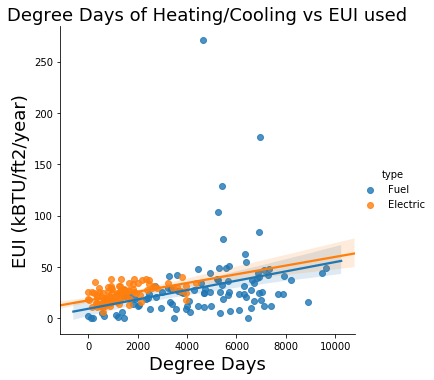

In [60]:
seaborn.lmplot(y='eui', x='DD', hue='type', data=dfanares)
plt.title("Degree Days of Heating/Cooling vs EUI used",fontsize=18)
plt.ylabel("EUI (kBTU/ft2/year)",fontsize=18)
plt.xlabel("Degree Days",fontsize=18)
plt.savefig(os.path.join("Data","plotsres","reg.png"))
plt.show()

In [55]:
result = sm.ols(formula='eui ~ DD + type + DD * type',data=dfanacom).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    eui   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     225.8
Date:                Thu, 12 Sep 2019   Prob (F-statistic):           1.21e-63
Time:                        16:40:25   Log-Likelihood:                -843.97
No. Observations:                 202   AIC:                             1696.
Df Residuals:                     198   BIC:                             1709.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          68.3441      2.633     